# Presentacion de medio termino
### Patricio de la Torre A00826990

# Introduccion
## Mi base de datos tiene la infromacion de los jugadores que aparecen en el FIFA 2021. Esta base de datos tiene 107 variabes y 17,125 datos. 


In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 23.2 MB 4.8 MB/s            
     |████████████████████████████████| 306 kB 38.0 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=95fc2cd6b90e2063af639ea7203698456cf595e1d73c926ceaca4511bf13d3d3
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.9 MB/s            
     |████████████████████████████████| 233 kB 46.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns # For plotting
import pandas as pd
import matplotlib.pyplot as plt # For showing plots
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

# Load in the data set
df = pd.read_csv('fifa21_male2.csv')
df

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

## Mis variables de interes, con las cuales voy a trabajar son las siguientes: 
### 'ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'Position', ya que las demas no aportan un valor reral a esta investigacion.


In [6]:
df.drop(['POT', 'Team & Contract', 'foot',
       'Growth', 'Joined', 'Loan Date End', 'Release Clause',
       'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM','Player Photo',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender', 'BOV', 'BP','Club Logo', 'Flag Photo','Height',
       'Weight', 'Value', 'Wage'],
       inplace = True,
        axis = 1
       )
df.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'Position'], dtype='object')

In [7]:
df

,ID,Name,Age,OVA,Nationality,Club,Position
0,2,G. Pasquale,33,69,Italy,Udinese,LM
1,16,Luis García,37,71,Spain,KAS Eupen,CM CAM CDM
2,27,J. Cole,33,71,England,Coventry City,CAM RM RW LM
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,NaN
4,41,Iniesta,36,81,Spain,Vissel Kobe,CM CAM
...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,CB
17121,259090,W. Rickard,18,56,Wales,Burnley,CAM CM
17122,259091,C. Barrett,18,56,England,Burnley,RB
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB LB


## En este caso terminamos con 7 variables, las cuales seran utilizadas para las preguntas posteriores.
### Hay 3 variables numericas enteras:
* ID es e numero de identificacion que se le da en el juego a cada jugador esta es una variable ordinal

* Age es la edad y es una variable nominal

* OVA es la calificacion promedio del jugador esta es un variable cuantitativa


### Por el otro lado hay 4 variables categoricas
* Name es el nombre de cada jugador

* Nationality describe la nacionalidad de cada jugador

* Clube es el club en el que juegan actualmente

* Position es la posicion en la que se desempena el jugador


## Algunos hallazgos interesante que descubri al analizar esos datos son ls siguiente:
* La edad mediana de los jugadores en el FIFA 2021 es de 25 anios

* La mayoria de los jugaodres tiene un promedio de entre 60 y 70 puntos de calificacion

* Existe una correlacion positiva fuerte entre la edad de los jugadores y su calificacion promedio


## PREGUNTA 1: Cual es el rango de edad de los jugadores en el FIFA 2021

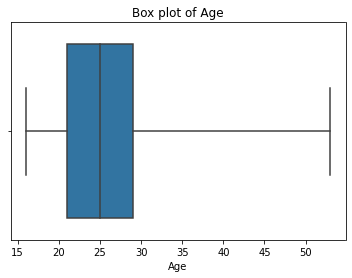

In [8]:
sns.boxplot(x = df["Age"], 
            whis=(0, 100),
           ).set_title("Box plot of Age")

plt.show()

### Conclusion: La edad mediana de los jugadores en FIFA 2021 es de 25 anios

## Pregunta 2: Cuales son las 10 nacionalidad con mas jugadores en el FIFA 2021

In [25]:
counts = df['Nationality'].value_counts()
type(counts)
counts = counts.to_frame() #para hacerlo una tabla
#print(type(counts))
#print(counts)
counts['%'] = counts.loc[:,'Nationality']/counts.loc[:,'Nationality'].sum(axis = 0)*100
counts10 = counts.head(10)
counts10

,Nationality,%
England,1707,9.967883
Germany,1154,6.738686
Spain,1121,6.545985
France,990,5.781022
Brazil,857,5.004380
Argentina,778,4.543066
Italy,565,3.299270
Netherlands,475,2.773723
Portugal,365,2.131387
United States,358,2.090511


Text(0.5, 1.0, 'Piechart of Nationality count')

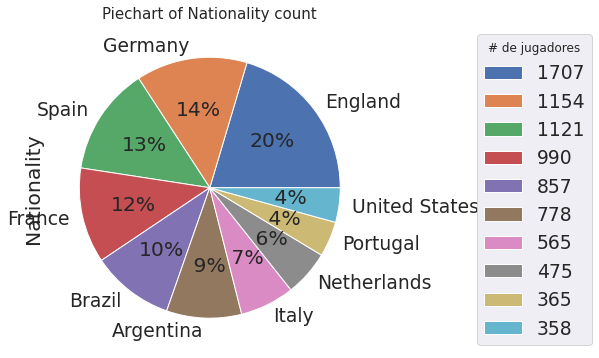

In [43]:
counts10['Nationality'].plot(kind = 'pie',
                  figsize = (15,6),   
                   autopct = '%2.f%%',
                   shadow = False
                  )
plt.legend(labels = counts10.Nationality,
           title = '# de jugadores',
           title_fontsize = 12,
          bbox_to_anchor = (1.7, 1)
          )
plt.title('Piechart of Nationality count', fontsize = 15)

## PREGUNTA 3: Como esta la distribucion de calificacion promedio de los jugadores de FIFA 2021

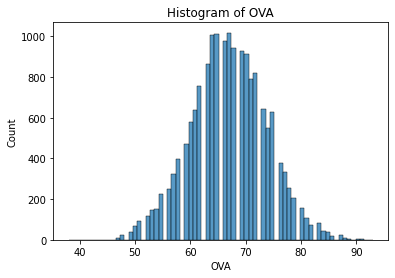

In [11]:
sns.histplot(df["OVA"], 
             kde = False).set_title("Histogram of OVA")

plt.show()

### Conclusion: La mayoria de los jugadores tienen un promedio de entre 60 y 70 puntos totales

## PREGUNTA 4: Existe una correlacion entre la edad y la calificacion asignada a un jugador

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


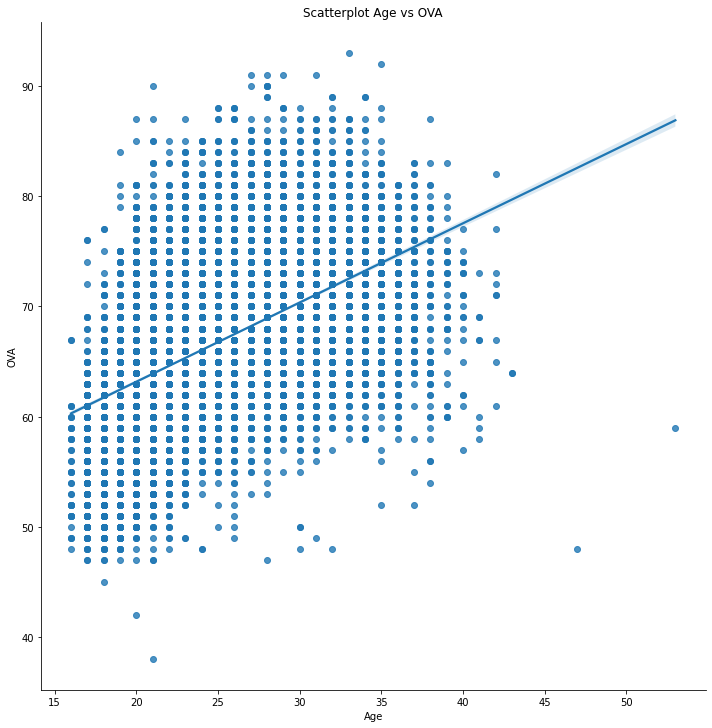

In [12]:
sns.lmplot(x='Age', 
           y='OVA', 
           data= df,
           size=10
          )
plt.title('Scatterplot Age vs OVA')
plt.show()

### Conclusion: Existe una correlacion fuerte y positiva entre la Edad y la calificacion promedio, lo cual significa que entre mayor sea la edad, en la mayoria de los casos, se espera que la calificacion sea mayor, estando las calificaciones mas altas antes de los 38 anios aproximadamente, despues empieza a bajar



## PREGUNTA 5: Cual es la mediana de calificacion promedio por jugador en el FIFA 2021

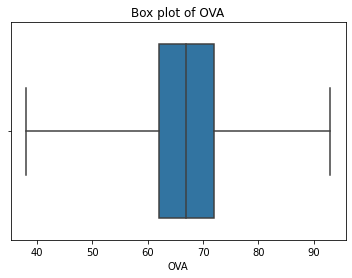

In [13]:
sns.boxplot(x = df["OVA"], 
            whis=(0, 100),
           ).set_title("Box plot of OVA")

plt.show()

### Conclusion: la mediana de calificacion en el FIFA 2021 es de 67

## Pregunta 6: Cua es la calificacion promedio por edad de los jugadores mexicanos en el FIFA 2021

In [14]:
condition = df['Nationality'] ==( 'Mexico')

print(condition)

0        False
1        False
2        False
3        False
4        False
         ...  
17120    False
17121    False
17122    False
17123    False
17124    False
Name: Nationality, Length: 17125, dtype: bool


In [15]:
df[condition]

,ID,Name,Age,OVA,Nationality,Club,Position
160,26709,R. Márquez,38,73,Mexico,Club Atlas,CB CDM
285,101015,N. Castillo,29,68,Mexico,Rayo Vallecano,NaN
406,135708,C. Blanco,42,71,Mexico,Club América,CAM
461,139006,O. Sánchez,40,71,Mexico,Santos Laguna,GK
462,139009,J. Beltrán,33,68,Mexico,Querétaro,NaN
...,...,...,...,...,...,...,...
16714,257966,E. Torres,20,58,Mexico,Guadalajara,CM CDM
16748,258081,L. Martínez Dupuy,19,59,Mexico,Rosario Central,ST
16807,258309,G. Galindo,20,53,Mexico,Tigres U.A.N.L.,GK
16861,258447,B. Sartiaguin,20,61,Mexico,Deportivo Toluca,CB


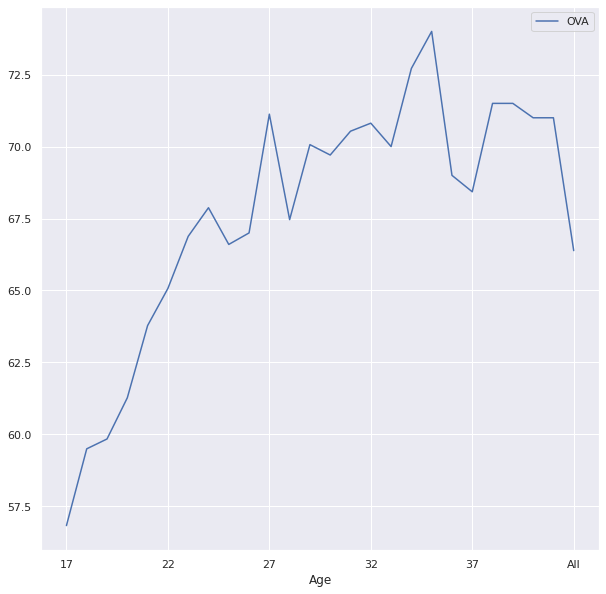

In [16]:
my_pivot = pd.pivot_table(df[condition],
                        index = ['Age'],values = ['OVA'],aggfunc = 'mean',
                        margins = True,
                          
                          
                         )
sns.set(rc={'figure.figsize' : (10,10)})
            
my_pivot.plot()

### Conclusion: Se puede ver como en los mexicanos, el mayor nivel de calificacion promedio se observa entre los 33 y 36 anios

## Pregunta 7: Cual es el impacto de AGE en OVA (calificacion promedio)?

In [17]:


modelA = sm.OLS.from_formula('OVA ~ Age', data=df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OVA   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     6250.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:02:29   Log-Likelihood:                -54623.
No. Observations:               17125   AIC:                         1.093e+05
Df Residuals:                   17123   BIC:                         1.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.8155      0.234    208.674      0.000      48.357      49.274
Age            0.7181      0.009     79.055      0.000       0.700       0.736
==============================================================================
Omnibus:                      278.506   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.398
Skew:                           0.238   Prob(JB):                     2.22e-76
Kurtosis:                       3.511   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Obsevaciones
* Variable dependiente: OVA
* Variable independiente: Age
* R-squared: 0.267; por lo tanto, este modelo no es eficiente.
* Df Model:	1	 
* intercept ... > 48.8155	, es estadisticamente significativo

`OVA = 48.8155	 + 0.7181*Age`

In [18]:
print('El OVA de un jugador con 33 anios de edad seria: \t', 48.8155     + 0.7181*33)
df.iloc[:3,:]

El OVA de un jugador con 33 anios de edad seria: 	 72.5128


,ID,Name,Age,OVA,Nationality,Club,Position
0,2,G. Pasquale,33,69,Italy,Udinese,LM
1,16,Luis García,37,71,Spain,KAS Eupen,CM CAM CDM
2,27,J. Cole,33,71,England,Coventry City,CAM RM RW LM


In [19]:
resultA.resid

0       -3.514156
1       -4.386725
2       -1.514156
3       -6.668583
4        6.331417
           ...   
17120   -0.614589
17121   -5.742019
17122   -5.742019
17123   -1.178304
17124   -2.742019
Length: 17125, dtype: float64

Text(35, 40, 'OVA = 48.8155     + 0.7181*Age')

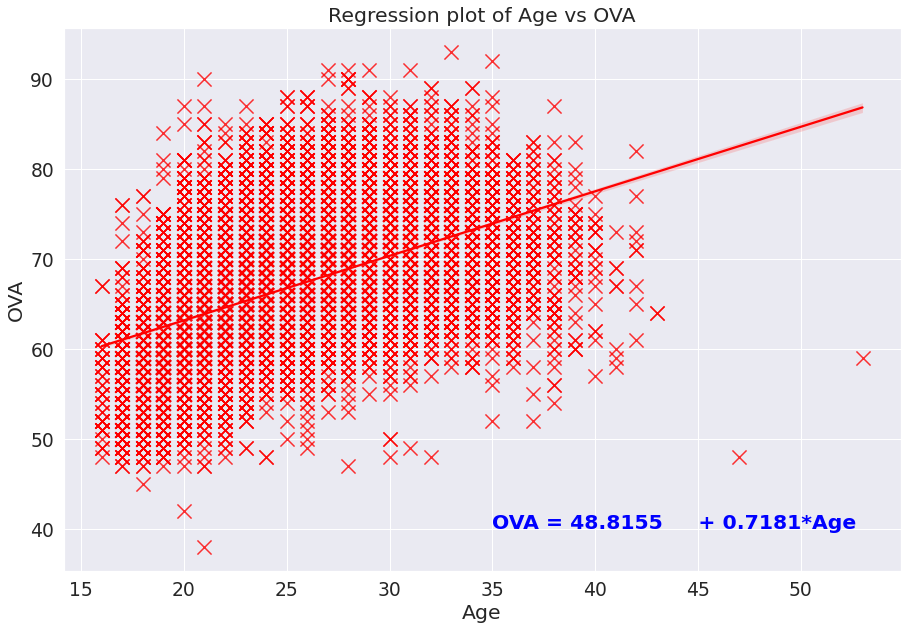

In [20]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.7)

reg_plot = sns.regplot( x = 'Age',
            y = 'OVA',
            data = df,
           marker = 'x',
           color = 'red',
                      scatter_kws = {'s':200}
                      )
reg_plot.set_title('Regression plot of Age vs OVA')
reg_plot.text(35, 40, 'OVA = 48.8155     + 0.7181*Age',
              color = 'blue',
              weight = 'semibold',
              size = 'medium'
             )


## Limitaciones

#### En esta ocacion tuve muchos problemas con los tamanios de las graficas, los tipos de variables y la limpieza de los datos. Ademas de que batalle un poco con el orden y limppieza para la presentacion

## Que sigue

#### Lo que sigue es limpiar los datos y ponerlos como el tipo de variable que corresponden, luego ampliar las graficas y hacer fitros para ver analisis mas concretos